In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns
%matplotlib inline
from pandas import datetime


In [3]:
ls data/

achive/  sample_submission.csv  store.csv  test.csv  train.csv


In [4]:
# load data sets
stores = pd.read_csv(r'./data/store.csv')
test = pd.read_csv(r'./data/test.csv')
#train = pd.read_csv(r'./data/train.csv')
train = pd.read_csv(r'./data/train.csv', parse_dates = True, low_memory = False, index_col = 'Date')
sample_out = pd.read_csv(r'./data/sample_submission.csv')

In [5]:
# data extraction
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

In [6]:
# explore
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31


In [7]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [8]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
# combine store information and training data
long_train = pd.merge(train, stores, how = 'inner', on = 'Store')

In [10]:
long_train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [11]:
long_train.shape

(1017209, 21)

In [12]:
long_train.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


## Observations:
1. Store type "b" has the highest mean average Sales and the remaining types has almost the same amount of sales during the training data period. 

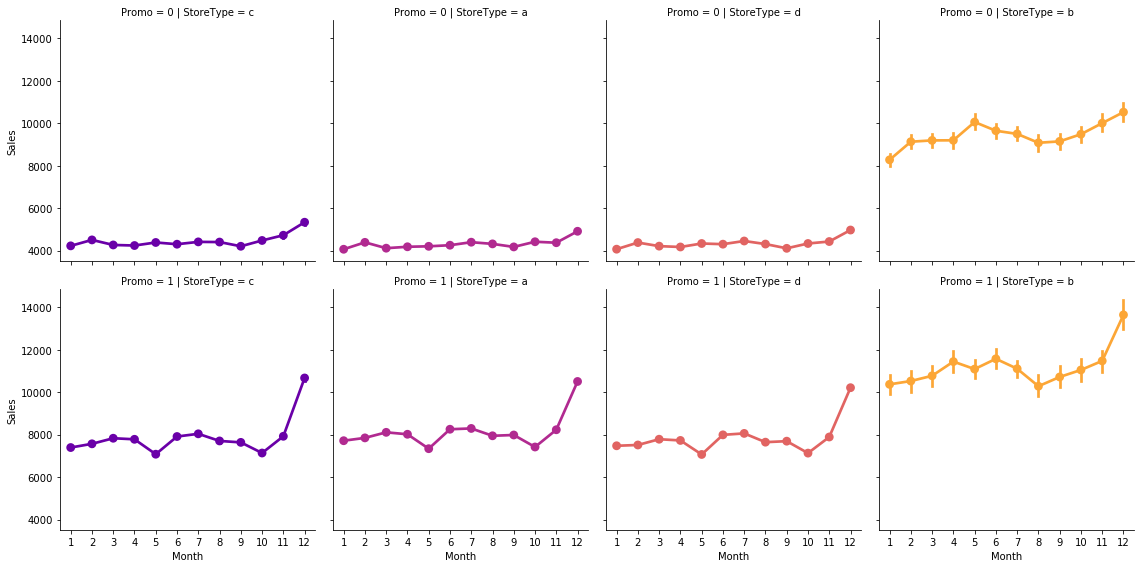

In [13]:
# sales trends
sns.factorplot(data = long_train, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               ) 

# Time series analysis for store = 3 

## Seasonality and Trend

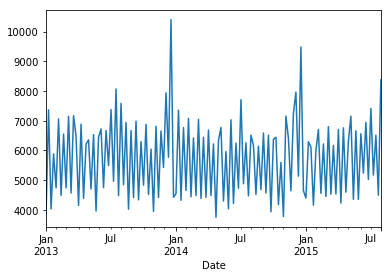

In [14]:
# Down sample the sales data from daily to weekly for better visualization
a = train[train.Store == 3]['Sales']
a.resample('W').mean().plot()

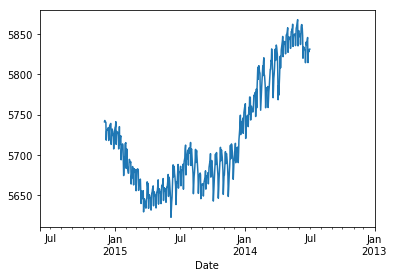

In [22]:
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
decomposition_a = seasonal_decompose(a, model = 'additive', freq = 365)
decomposition_a.trend.plot()


 ### Observations from the above plots: 
 Seasonal peaks are around the year end! and the average trend is up over the years

# ARIMA model

### Stationary checks

In [28]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [29]:
type(a)

pandas.core.series.Series

In [30]:
stationary = difference(a, 1)

ADF Statistic: -14.714910
p-value: 0.000000
Critical Values:
	5%: -2.865
	10%: -2.568
	1%: -3.437


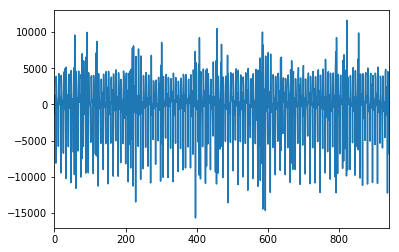

In [36]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')
# plot
stationary.plot()

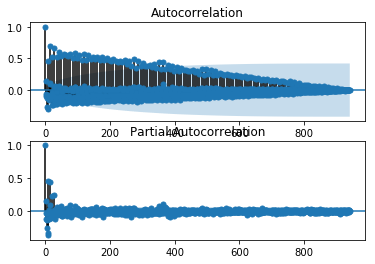

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure()
plt.subplot(211)
plot_acf(a, ax=plt.gca())
plt.subplot(212)
plot_pacf(a, ax=plt.gca())
plt.show()

### Observations: (p,d,q) = (1,0,1) is a good start for ARIMA model from the above. 

In [15]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff


# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


# prepare data
X = a.values
X = X.astype('float32')

/home/ashish/anaconda3/envs/keras/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [17]:
# walk-forward validation
history = [x for x in train]

In [18]:
predictions = list()
for i in range(len(test)):
	# difference data
	interval = 1
	diff = difference(history, interval)
	# predict
	model = ARIMA(diff, order=(1,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, interval)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=6066.581, Expected=9311
>Predicted=6227.193, Expected=10021
>Predicted=6349.506, Expected=10103
>Predicted=6383.509, Expected=  0
>Predicted=4873.246, Expected=3795
>Predicted=5418.858, Expected=6169
>Predicted=5770.321, Expected=5683
>Predicted=5699.694, Expected=5389
>Predicted=5655.769, Expected=5218
>Predicted=5629.715, Expected=5121
>Predicted=5614.289, Expected=  0
>Predicted=4847.368, Expected=3904
>Predicted=5417.414, Expected=7562
>Predicted=5964.748, Expected=7477
>Predicted=5957.502, Expected=7481
>Predicted=5962.104, Expected=6800
>Predicted=5862.872, Expected=13588
>Predicted=6903.898, Expected=  0
>Predicted=4902.086, Expected=4200
>Predicted=5485.385, Expected=6194
>Predicted=5769.289, Expected=4969
>Predicted=5595.667, Expected=5158
>Predicted=5621.008, Expected=5207
>Predicted=5627.104, Expected=5248
>Predicted=5632.117, Expected=  0
>Predicted=4877.677, Expected=4389
>Predicted=5495.920, Expected=6765
>Predicted=5836.795, Expected=7390
>Predicted=5929.508, 

>Predicted=4867.642, Expected=3525
>Predicted=5389.952, Expected=4692
>Predicted=5565.394, Expected=5225
>Predicted=5645.643, Expected=5070
>Predicted=5621.495, Expected=5290
>Predicted=5654.243, Expected=4369
>Predicted=5513.146, Expected=  0
>Predicted=4838.981, Expected=3242
>Predicted=5326.372, Expected=7585
>Predicted=5994.917, Expected=8369
>Predicted=6120.325, Expected=8452
>Predicted=6139.331, Expected=10004
>Predicted=6389.028, Expected=10962
>Predicted=6557.848, Expected=  0
>Predicted=4842.868, Expected=3883
>Predicted=5434.194, Expected=5991
>Predicted=5760.846, Expected=5916
>Predicted=5749.941, Expected=5982
>Predicted=5760.542, Expected=6166
>Predicted=5789.352, Expected=5991
>Predicted=5762.702, Expected=  0
>Predicted=4832.020, Expected=4546
>Predicted=5530.387, Expected=7610
>Predicted=6005.845, Expected=8738
>Predicted=6185.814, Expected=10895
>Predicted=6535.533, Expected=10451
>Predicted=6483.462, Expected=10853
>Predicted=6566.586, Expected=  0
>Predicted=4829.768

>Predicted=5911.331, Expected=  0
RMSE: 3289.464


In [21]:
model_fit.save('model.pkl')